# Check Ultralytics / YOLO11 Library

In [1]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code


In [2]:
!nvidia-smi

Mon Nov 18 12:47:28 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  |   00000000:07:00.0  On |                  N/A |
|  0%   37C    P8             20W /  270W |    1187MiB /   8192MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Sep_12_02:55:00_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.77
Build cuda_12.6.r12.6/compiler.34841621_0


In [4]:
import torch
print(torch.cuda.is_available())

True


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (16 CPUs, 31.9 GB RAM, 199.2/237.6 GB disk)


In [8]:
!yolo task=segment mode=predict model=yolo11l-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

Ultralytics 8.3.32 ðŸš€ Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11l-seg summary (fused): 491 layers, 27,646,272 parameters, 0 gradients, 142.2 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 76.3ms
Speed: 3.0ms preprocess, 76.3ms inference, 72.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\segment\predict
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


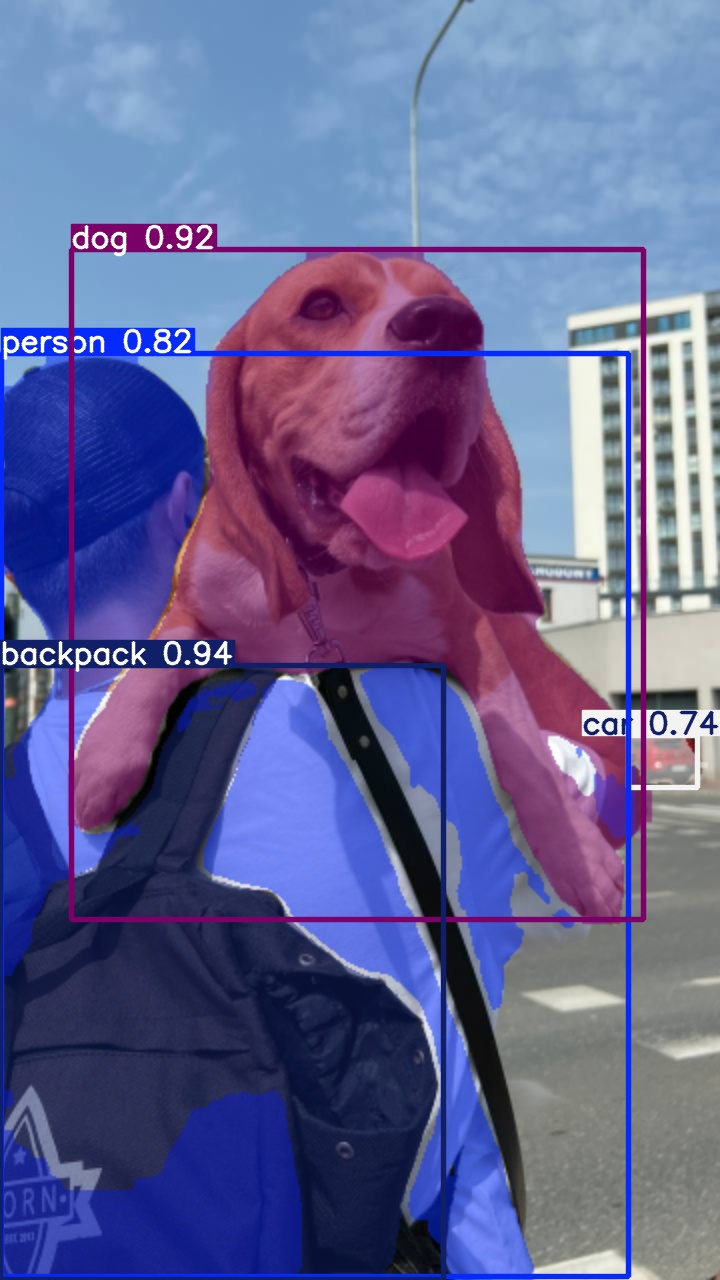

In [10]:
import os
from IPython.display import Image as IPyImage

HOME = os.getcwd()
file_path = os.path.join(HOME, 'runs', 'segment', 'predict', 'dog.jpg')
IPyImage(filename=file_path, width=600)

In [11]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11l-seg.pt')
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw)
result = model.predict(image, conf=0.25)[0]


0: 640x384 1 person, 1 car, 1 dog, 1 backpack, 78.1ms
Speed: 0.0ms preprocess, 78.1ms inference, 62.5ms postprocess per image at shape (1, 3, 640, 384)


In [12]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

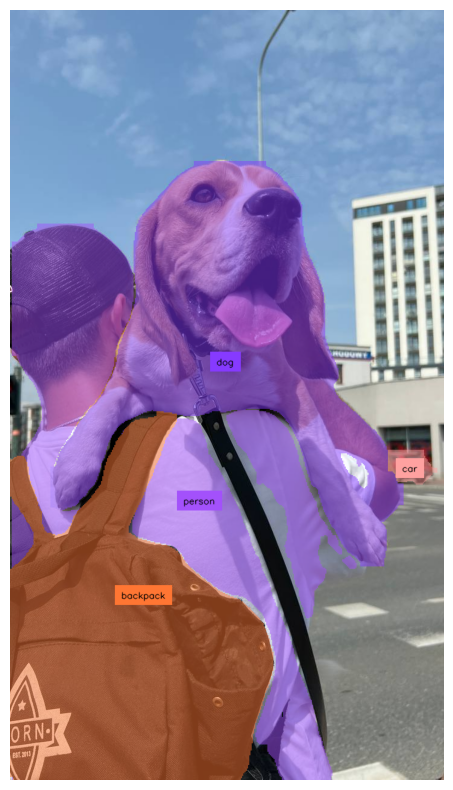

In [13]:
mask_annotator = sv.MaskAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK, text_position=sv.Position.CENTER)

annotated_image = image.copy()
annotated_image = mask_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))

# Training Custom Dataset YOLO11 Instance Segmentation

In [14]:
import logging
logging.basicConfig(level=logging.INFO)

In [16]:
HOME = os.getcwd()
HOME

'C:\\Users\\LIK\\Documents\\GitHub\\segmentation-robot-navigation\\python-code'

In [17]:
import os
os.makedirs("datasets")

In [18]:
file_path = os.path.join(HOME, 'datasets')
print(file_path)

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets


In [19]:
%cd {HOME}/datasets

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets


In [20]:
%cd {HOME}

C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code


In [17]:
from roboflow import Roboflow
rf = Roboflow(api_key="uZ6Fr7pg6ezFrqbUPjJB")
project = rf.workspace("rameshprabha").project("drivable_area1")
version = project.version(8)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to drivable_area1-8 in yolov11:: 100%|████████████| 3855/3855 [00:01<00:00, 2426.19it/s]


In [21]:
from roboflow import Roboflow
rf = Roboflow(api_key="uZ6Fr7pg6ezFrqbUPjJB")
project = rf.workspace("tarobotsemprot").project("navigasi-robot-semprot-5")
version = project.version(1)
dataset = version.download("yolov11")             

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to navigasi-robot-semprot-5-1 in yolov11:: 100%|██| 3530/3530 [00:01<00:00, 2312.29it/s]


In [23]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11s-seg.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="navigasi-robot-semprot-5-1/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=navigasi-robot-semprot-5-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

train: Scanning C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\train\labels... 1533 i


train: New cache created: C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\train\labels.cache


val: Scanning C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\valid\labels... 156 imag

val: New cache created: C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\valid\labels.cache


Plotting labels to runs\segment\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.26G     0.9209      1.955       1.45      1.373         40        640: 100%|██████████| 96/96 [00:32
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.264      0.666      0.377      0.184      0.287      0.693      0.417      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100       5.2G     0.8872      1.336     0.8209      1.299         38        640: 100%|██████████| 96/96 [00:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.389      0.454      0.365      0.122      0.393      0.484      0.396      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.18G     0.8903      1.316       0.78      1.309         53        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.409      0.498      0.445      0.148      0.407      0.519      0.482      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.19G      0.855      1.246     0.7352      1.271         46        640: 100%|██████████| 96/96 [00:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.483      0.634      0.555      0.311      0.489      0.637      0.585      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.18G     0.8141      1.207      0.698      1.251         36        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.603      0.795      0.743      0.489       0.62      0.798      0.763      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.18G     0.7675      1.146     0.6401      1.205         45        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.736      0.782       0.82       0.52       0.74       0.78      0.823      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       5.2G     0.7519      1.153     0.6117      1.197         46        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.691      0.635      0.737      0.536      0.722      0.655      0.753      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100       5.2G     0.7204      1.098     0.5679      1.176         43        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.648      0.762      0.723      0.501      0.712      0.745      0.748      0.556



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.17G      0.697      1.056     0.5483      1.163         35        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.914       0.87      0.924       0.65      0.914       0.87      0.921      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.19G     0.6827      1.064     0.5378      1.146         47        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.909       0.93      0.947      0.697      0.909       0.93      0.943      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.17G     0.6825      1.061     0.5202      1.145         37        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.89      0.923      0.932      0.719       0.89      0.923      0.929      0.735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100       5.2G     0.6696      1.019     0.4989      1.127         41        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.935      0.958      0.936      0.697      0.935      0.958      0.936      0.724



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.16G     0.6277     0.9898     0.4699      1.109         51        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.96      0.948      0.971      0.729       0.96      0.948      0.968      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100       5.2G     0.6343      1.005     0.4622      1.116         36        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.951      0.924      0.963      0.683      0.951      0.924      0.964      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.22G     0.6349     0.9972     0.4673      1.106         53        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.841      0.939      0.919      0.699      0.841      0.939      0.916      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.22G     0.6244       0.98     0.4607      1.109         47        640: 100%|██████████| 96/96 [00:24
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.908      0.961      0.947      0.723      0.908      0.961      0.947       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.18G     0.6269      0.974     0.4614      1.105         46        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.975      0.896      0.955      0.747      0.975      0.896      0.961      0.769



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.2G     0.6058     0.9527     0.4381      1.096         45        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.945      0.912      0.942      0.725      0.945      0.912      0.942      0.721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100       5.2G     0.5953     0.9343     0.4308      1.091         42        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.867      0.952      0.942       0.71      0.867      0.952      0.942       0.74



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.18G      0.587     0.9143     0.4086      1.081         44        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.956      0.931      0.968      0.761      0.956      0.931      0.968      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       5.2G      0.586       0.93     0.4204      1.085         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.968      0.948      0.979      0.739      0.968      0.948      0.985      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.2G     0.5838     0.9007     0.4196      1.082         36        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.949      0.936       0.94      0.764      0.949      0.936      0.942      0.764



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.18G     0.5727     0.9074     0.4056      1.066         43        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.976      0.917      0.959      0.752      0.987      0.931      0.966      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.2G     0.5717     0.9207     0.4001      1.071         42        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.972      0.968      0.979      0.782      0.972      0.968      0.984      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.2G     0.5658     0.9115      0.402      1.064         50        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.942      0.959       0.98      0.796      0.942      0.959       0.98      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.18G     0.5691     0.8967     0.3994       1.07         41        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.916      0.958      0.927      0.735      0.916      0.958       0.92      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.18G     0.5659     0.9007     0.3994       1.06         47        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.933      0.962      0.962      0.752      0.933      0.962      0.962      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.18G     0.5594     0.8974     0.3937      1.064         45        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.894      0.948      0.963      0.756      0.895      0.946      0.965      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.2G     0.5559      0.867     0.3891      1.055         47        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.946      0.964      0.955      0.796      0.946      0.964      0.955      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.18G      0.558     0.8879     0.3903      1.065         41        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.973      0.968      0.968      0.778      0.973      0.968      0.968      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.18G     0.5547     0.8885     0.3814      1.057         46        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.942      0.963      0.944      0.776      0.942      0.963      0.947      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.18G     0.5399      0.852      0.364      1.044         47        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.924      0.943      0.942      0.778      0.924      0.943      0.948       0.78



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       5.2G     0.5259     0.8418     0.3594      1.042         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.935      0.961      0.944       0.76      0.935      0.961      0.944      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.14G     0.5405     0.8558     0.3745      1.052         39        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.992      0.968      0.987      0.809      0.992      0.968      0.991      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100       5.2G     0.5304     0.8596     0.3653      1.039         33        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.959      0.968      0.986      0.809      0.959      0.968      0.986      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.18G     0.5401     0.8677     0.3585      1.044         46        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.92      0.964      0.962      0.785       0.92      0.964      0.962      0.803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100       5.2G     0.5252     0.8542     0.3537       1.04         52        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.949      0.968      0.973      0.798      0.949      0.968      0.978      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.18G     0.5189      0.836      0.348      1.036         45        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.968      0.983      0.828      0.981      0.968      0.983      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100       5.2G     0.5246     0.8427     0.3466      1.038         41        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.945      0.959      0.966      0.802      0.945      0.959      0.966      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       5.2G     0.5165     0.8268     0.3536      1.029         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.98      0.967      0.986      0.818       0.98      0.967      0.986      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       5.2G     0.5178     0.8193     0.3462      1.033         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.959      0.964       0.99      0.822      0.959      0.964      0.991      0.832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100       5.2G     0.5138     0.8429     0.3408      1.033         47        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.946       0.96       0.98      0.809      0.943      0.957       0.98      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.22G     0.5101     0.8271     0.3331      1.025         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.982       0.95      0.978      0.801      0.982       0.95      0.972      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       5.2G       0.51     0.8026     0.3354      1.028         49        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.948      0.962      0.977       0.82      0.948      0.962      0.977      0.814



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100       5.2G     0.4894     0.7864     0.3179      1.019         43        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.968      0.988      0.833      0.982      0.982      0.989      0.826



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       5.2G     0.5138     0.8039     0.3365      1.022         44        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.979      0.964      0.989      0.803      0.978      0.979      0.992      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.18G     0.5039      0.803     0.3308      1.023         40        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.974      0.968      0.981      0.817      0.974      0.968      0.981       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.18G     0.4889     0.7805     0.3241      1.012         48        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.987      0.967       0.99      0.822      0.987      0.967       0.99       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100       5.2G     0.4878     0.8026     0.3208      1.012         44        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.979      0.968      0.987      0.834      0.979      0.968      0.974      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100       5.2G     0.4852     0.7936     0.3155      1.014         36        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.901      0.959       0.95      0.779      0.906      0.959      0.951      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.18G     0.4798     0.7736     0.3171      1.009         46        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.967      0.968      0.987       0.84      0.967      0.968      0.987      0.835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100       5.2G     0.4759     0.7739     0.3092       1.01         39        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.978      0.962      0.992      0.846      0.978      0.962      0.992      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.15G     0.4783     0.7922     0.3184      1.009         37        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.967      0.968      0.985      0.843      0.967      0.968      0.985       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.18G     0.4683      0.746     0.3009     0.9995         52        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.946      0.979      0.982      0.833      0.946      0.979      0.982      0.837



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100       5.2G     0.4769     0.7785       0.31      1.011         53        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.967      0.957      0.982       0.85      0.967      0.957      0.982      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.18G     0.4753     0.7696      0.303      1.004         44        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.98      0.968      0.984      0.839       0.98      0.968      0.984      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100       5.2G     0.4677     0.7533     0.2995      0.997         51        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.961      0.964      0.966      0.836      0.961      0.964      0.966      0.829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.18G     0.4666     0.7696     0.2959     0.9976         49        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.953      0.978      0.971      0.838      0.953      0.978      0.971      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100       5.2G     0.4639     0.7498      0.295      0.997         38        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.98      0.968      0.985      0.834       0.98      0.968      0.985      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       5.2G     0.4503     0.7405     0.2926     0.9963         45        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.992      0.992      0.858      0.981      0.992      0.992      0.851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.18G     0.4476     0.7269     0.2885     0.9899         46        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.959      0.964      0.977      0.829      0.959      0.964      0.977      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.18G     0.4452     0.7343      0.292     0.9889         45        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.951      0.981      0.983      0.844      0.951      0.981      0.983      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100       5.2G     0.4446     0.7346     0.2876     0.9899         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.98      0.975      0.991      0.851       0.98      0.975      0.991       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.18G     0.4443     0.7271     0.2819     0.9856         52        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.949      0.961      0.948      0.833      0.949      0.961      0.948      0.822



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100       5.2G     0.4383     0.7292     0.2856     0.9879         40        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.968      0.992      0.858      0.981      0.968      0.992      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100       5.2G     0.4486     0.7173     0.2766       0.99         42        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.964      0.967      0.988       0.86      0.964      0.967      0.988      0.859



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.18G     0.4329     0.7141       0.28     0.9809         47        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.985      0.968       0.99      0.848      0.985      0.968       0.99      0.838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100       5.2G     0.4322     0.6961       0.28     0.9892         41        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.968      0.991      0.855      0.981      0.968      0.991       0.84



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100       5.2G     0.4348      0.727     0.2799     0.9868         52        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.938      0.979      0.962      0.838      0.938      0.979      0.962      0.818



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100       5.2G     0.4293     0.7232     0.2743     0.9839         44        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.966      0.965      0.981      0.858      0.966      0.965      0.981      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.18G     0.4342     0.6957     0.2728     0.9859         41        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181       0.98      0.968      0.983      0.846       0.98      0.968      0.983      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100       5.2G     0.4211     0.6839     0.2693     0.9784         36        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.982      0.989      0.859      0.981      0.982      0.989      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.18G     0.4188     0.6909     0.2674     0.9796         42        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.964      0.968      0.982      0.857      0.964      0.968      0.982      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.18G     0.4089     0.6774     0.2606     0.9719         39        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.967      0.984      0.985      0.845      0.967      0.984      0.985       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.18G     0.4258      0.696     0.2658      0.977         41        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.965      0.964      0.976      0.849      0.965      0.964      0.976      0.833



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.16G     0.4209     0.6814     0.2585     0.9763         40        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.977      0.948      0.983      0.856      0.977      0.948      0.983      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100       5.2G     0.4077     0.6725     0.2514     0.9692         40        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.962      0.962      0.987      0.838      0.962      0.962      0.987      0.839



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100       5.2G     0.4162     0.6896      0.264     0.9713         46        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.957          1      0.985      0.845      0.957          1      0.985      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.18G      0.414     0.6904     0.2595     0.9768         48        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.982       0.98      0.993      0.852      0.982       0.98      0.993      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.18G     0.4006     0.6797     0.2497     0.9626         43        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.964      0.962      0.982      0.857      0.964      0.962      0.982      0.835



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100       5.2G     0.3965     0.6744     0.2481     0.9652         43        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.984      0.981      0.992      0.836      0.984      0.981      0.992      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.15G     0.3994     0.6718     0.2503     0.9683         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.954          1      0.985      0.839      0.954          1      0.985      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       5.2G     0.3995     0.6741     0.2484     0.9704         44        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.968      0.999      0.984      0.839      0.968      0.999      0.984      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.22G     0.3973     0.6625     0.2435     0.9666         44        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.973      0.989      0.857      0.981      0.973      0.989      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100       5.2G     0.3992     0.6688      0.243     0.9652         48        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.982      0.979      0.986      0.837      0.982      0.979      0.986      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.18G     0.3991     0.6809     0.2533     0.9658         45        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.984      0.988      0.858      0.981      0.984      0.988      0.843



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.18G     0.3878     0.6448     0.2388     0.9584         40        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.982      0.997      0.987      0.877      0.982      0.997      0.987      0.864



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100       5.2G     0.3849     0.6547     0.2385     0.9615         46        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.978      0.987      0.986      0.865      0.978      0.987      0.986      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100       5.2G     0.3981     0.6516     0.2465     0.9626         40        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.982      0.964      0.985      0.859      0.982      0.964      0.985      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       5.2G     0.3823     0.6529     0.2361      0.959         47        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.969      0.993      0.984      0.861      0.969      0.993      0.984      0.849


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.11G     0.3028     0.5307     0.2088     0.9556         14        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.952      0.968       0.96      0.829      0.952      0.968       0.96       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.11G     0.2981     0.5163     0.1961     0.9581         14        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.981      0.951      0.983       0.86      0.981      0.951      0.983      0.865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.11G     0.2873     0.4961     0.1961     0.9464         13        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.976      0.975      0.985      0.883      0.976      0.975      0.985      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.11G     0.2842     0.4895     0.1876     0.9422         14        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.973      0.981      0.973      0.861      0.973      0.981      0.973      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.11G     0.2799     0.4824     0.1853     0.9347         14        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.983      0.998      0.987      0.882      0.983      0.998      0.987      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      5.11G     0.2802     0.4793     0.1838     0.9401         16        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.983      0.984      0.986      0.874      0.983      0.984      0.986      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.11G     0.2711     0.4786     0.1773     0.9272         15        640: 100%|██████████| 96/96 [00:22
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.983          1      0.988      0.876      0.983          1      0.988      0.868



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.11G     0.2622     0.4764      0.174     0.9201         15        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.955          1      0.986      0.876      0.955          1      0.986      0.865



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.11G     0.2638     0.4698     0.1769     0.9299         14        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.983      0.996      0.987      0.878      0.983      0.996      0.987      0.871



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.11G     0.2672     0.4746     0.1705     0.9324         14        640: 100%|██████████| 96/96 [00:23
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP

                   all        156        181      0.984      0.979      0.985      0.872      0.984      0.979      0.985      0.867



100 epochs completed in 0.712 hours.
Optimizer stripped from runs\segment\train3\weights\last.pt, 20.5MB
Optimizer stripped from runs\segment\train3\weights\best.pt, 20.5MB

Validating runs\segment\train3\weights\best.pt...
Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        156        181      0.984      0.998      0.987      0.879      0.984      0.998      0.987      0.871
                 jalur        150        150      0.998          1      0.995      0.962      0.998          1      0.995      0.953
           ujung-jalur         31         31      0.969      0.996      0.978      0.796      0.969      0.996      0.978      0.789
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\segment\train3


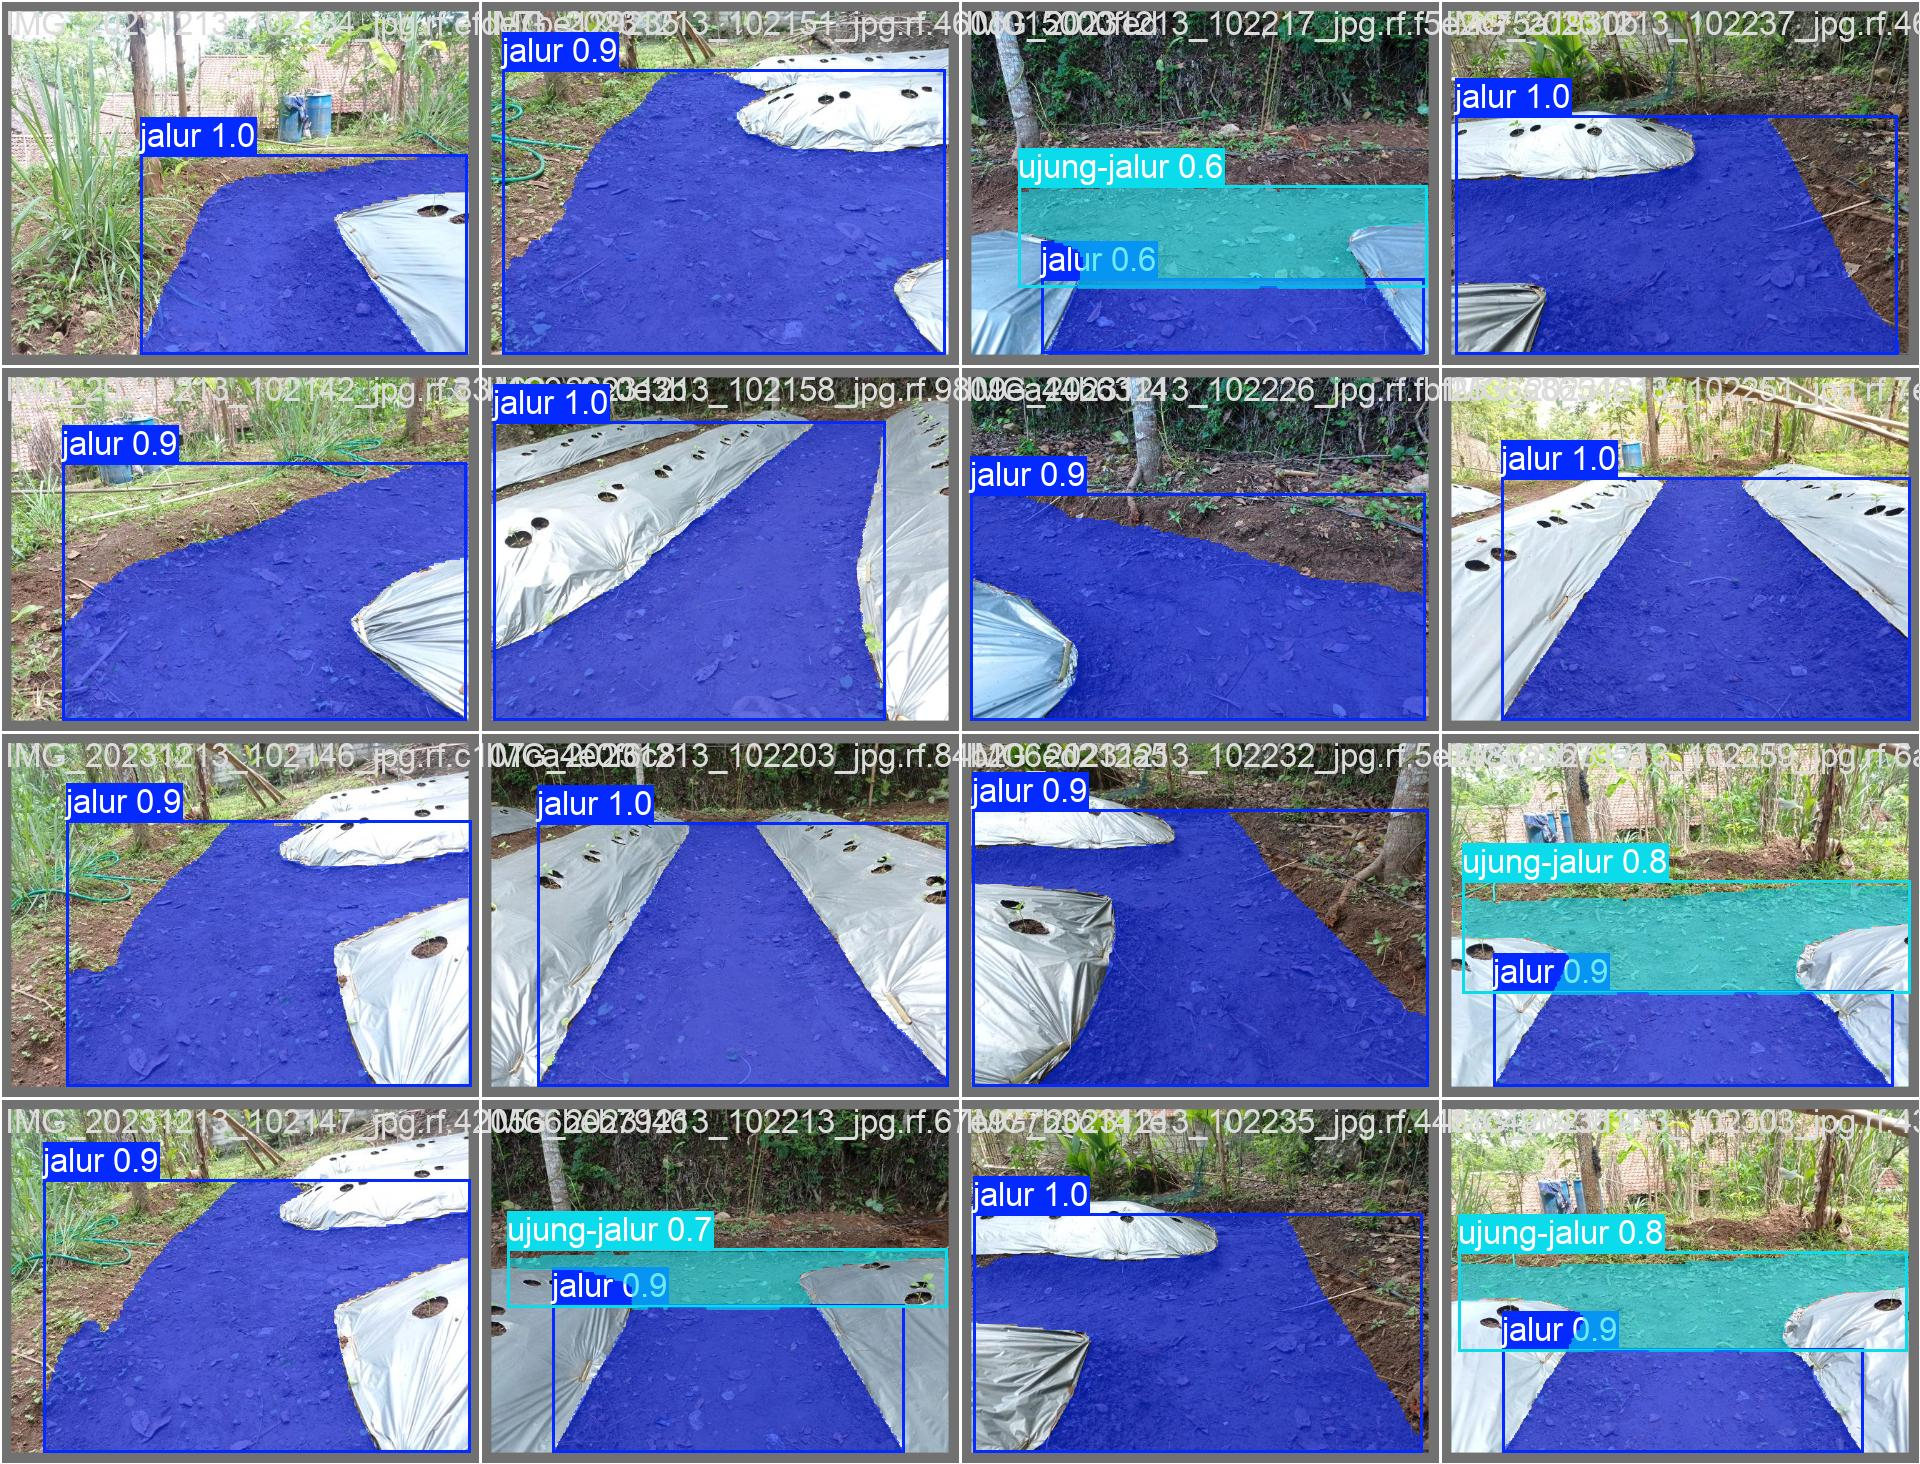

In [24]:
from IPython.display import Image as IPyImage

IPyImage(filename='runs/segment/train3/val_batch0_pred.jpg', width=600)

In [25]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("runs/segment/train3/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps  # a list contains map50-95(B) of each category
metrics.seg.map  # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps  # a list contains map50-95(M) of each category

Ultralytics 8.3.32  Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs


val: Scanning C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\valid\labels.cache... 15
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP


                   all        156        181      0.983      0.996      0.987      0.879      0.983      0.996      0.987      0.867
                 jalur        150        150      0.998          1      0.995      0.962      0.998          1      0.995      0.953
           ujung-jalur         31         31      0.968      0.991      0.978      0.796      0.968      0.991      0.978      0.782
Speed: 0.6ms preprocess, 5.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\segment\val2


array([    0.95303,     0.78176])

In [28]:
from ultralytics import YOLO

# Load a model
#model = YOLO("yolo11n-seg.pt")  # load an official model
model = YOLO("runs/segment/train3/weights/best.pt")  # load a custom model

# Predict with the model
results = model("datasets/test/images")  # predict on an image


image 1/1 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\test\images\VID_20231122_135653_out0006_jpg.rf.c2c7d6c45f8e2fd84fb29acfa5d5aabf.jpg: 480x640 2 jalurs, 76.0ms
Speed: 15.6ms preprocess, 76.0ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)


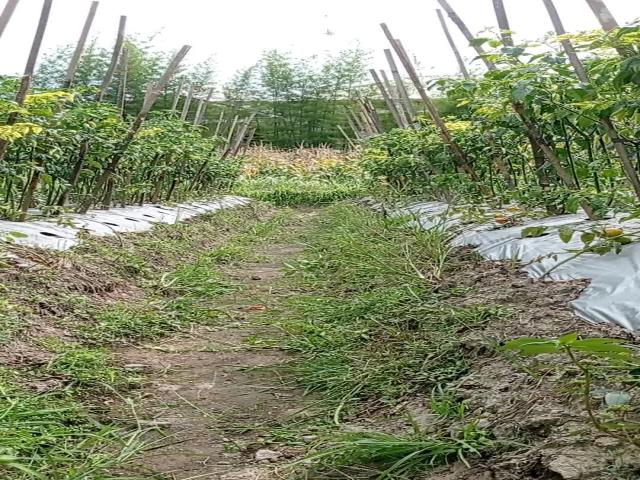

In [29]:
from IPython.display import Image as IPyImage

IPyImage(filename='datasets/test/images/VID_20231122_135653_out0006_jpg.rf.c2c7d6c45f8e2fd84fb29acfa5d5aabf.jpg', width=600)

In [31]:
!yolo task=segment mode=predict model="runs/segment/train3/weights/best.pt" conf=0.25 source='datasets/dataset-robot-semprot/test/images/jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg' save=True

Ultralytics 8.3.32 ðŸš€ Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs

image 1/1 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\dataset-robot-semprot\test\images\jal3-2-_out0135_jpg.rf.bc94f65ebc5f01d74a8b4339ae28966b.jpg: 480x640 1 rows, 71.2ms
Speed: 2.4ms preprocess, 71.2ms inference, 94.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict2
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


In [32]:
!yolo task=segment mode=predict model=runs/segment/train3/weights/best.pt conf=0.25 source=datasets/train/images save=True

Ultralytics 8.3.32 ðŸš€ Python-3.12.5 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11s-seg summary (fused): 265 layers, 10,067,590 parameters, 0 gradients, 35.3 GFLOPs

image 1/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\train\images\IMG_20231213_102113_jpg.rf.09a008c7f8a37c5e3159dd41050df311.jpg: 480x640 1 jalur, 80.9ms
image 2/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\train\images\IMG_20231213_102113_jpg.rf.2bf1e2dd3b5e5f9743fb83cb61005be6.jpg: 480x640 1 jalur, 13.1ms
image 3/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\train\images\IMG_20231213_102113_jpg.rf.5dcf8e18e27c56f76366bc08c7ba78cf.jpg: 480x640 1 jalur, 10.0ms
image 4/1533 C:\Users\LIK\Documents\GitHub\segmentation-robot-navigation\python-code\datasets\train\images\IMG_20231213_102115_jpg.rf.605618513f7c0aae9d18fb1064a4a229.jpg: 480x640 1 jalur, 11.1ms
image 5/1533 C:\Users\LIK\Do